## Linear Methods for Classification

This section deals with Logistic Regression and Linear Discriminant Analysis for classification problems.

### Logistic Regression
For a binary classification problem with class $0$ or $1$, one could apply regression by least squares. The $X \hat{\beta}$ so obtained in this case can be shown to actually be an estimate of $Pr(Y=1 \mid X)$. But the estimates from linear regression tend to be outside the [0, 1] interval, and hence not useful for a probabilistic interpretation. In Logistic regression, we avoid this problem by applying a function that gives outputs between $0$ to $1$ for all input values - the ___logit___ aka ___sigmoid___ function. 

Rather than modelling the response variable $Y$ directly, logistic regression models the probability that $Y$ belongs to a particular category, i.e., the conditional probability of $Y$ given the predictors $X$: $p(X) = P(Y=1 \mid X)$. These take values in the interval $[0, 1]$. We could then predict (or assign) an observation to a particular class based on a threshold probability value. For example, we could assign the observation to class $1$ if $p(X) = Pr(Y = 1 \mid X) > 0.5$, and to the other class otherwise. Depending on the application, we might also want to be conservative about our prediction and instead choose lower values like $0.1$ as threshold.

We model the $p(x)$ as a sigmoid function:

$$p(X) = \frac{\exp(\beta_0 + \beta_1X)}{1 + \exp(\beta_0 + \beta_1X)}$$

A bit of algebra would show that:

$$\log \frac{p(X)}{1 - p(X)} = \beta_0 + \beta_1X$$

$\frac{p(X)}{1 - p(X)}$ is called the ___odds___, and the ___log-odds___ (aka logit) is shown to be linear in $X$. For logistic regression, the optimization problem we want to solve is to find estimates for $\beta$ such that the estimated probability $\hat p(x_i)$ corresponds as closely as possible to the original training observation. This approach is known as the ___maximum likelihood___ approach. Formally, we seek to find estimates $\beta$ that maximizes the _likelihood_ function:

$$L(\beta) = \prod_{i:y_i=1}p(x_i) \prod_{i^\prime: y_{i^\prime} = 0}(1 - p(x_{i^\prime}))$$

or any monotonic function of $L$, specifically the ___log-likelihood___ as is often used for convenience:

\begin{align}
\ell(\beta)
&= \log L(\beta)\\
&= \sum_{i = 1}^{n} \{y_i \log p(x_i) + (1 - y_i)\log(1 - p(x_i))\}\\
&= \sum_{i = 1}^{n}\{y_i\beta^Tx_i - \log (1 + e^{\beta^Tx_i})\}
\end{align}

The coefficients estimated from logistic regression refer to the change in log-odds of the response and not the response itself.


### Linear Discriminant Analysis
In logistic regression, we directly modeled the conditional distribution $Pr(Y = k \mid X = x)$. In Linear Discriminant Analysis (LDA), we instead model the distribution of predictors $X$ in each class, and then use Bayes's Theorem to compute the estimates for $Pr(Y = k \mid X = x)$.

We have $K \ge 2$ classes in the response variable. Let $f_k(x)$ be the density function of $X$ in class $k$, and $\pi_k$ be the prior probability of class $k$,  i.e., the probability that a randomly chosen observation comes from the $k$th class, with $\sum_{k=1}^K \pi_k = 1$. Baye's theorem now gives us:

$$\Pr(Y = k \mid X = x) = p_k(x) = \frac{\pi_kf_k(x)}{\sum_{l=1}^K \pi_l f_l(x)}$$

If we have estimates for $\pi_k$ and $f_k$, we can compute $p_k(x)$. Lets model $f_k(x)$ as a Gaussian:

$$f_k(x) = \frac{1}{(2 \pi)^{p / 2} \lvert\Sigma\rvert ^{1/2}} \exp \left( \frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu) \right)$$

where $p$ is the number of predictors, $\mu$ is the mean of $X$ and $\Sigma = Cov(X)$ with $\Sigma_k = \Sigma$ $\forall k$. In practice, we do not know the parameters of the Gaussian distributions, and hence have to be estimated:

\begin{align}
\hat \pi_k &= \frac{n_k}{n} \\
\hat \mu_k &= \frac{1}{n_k} \sum_{i:y_i=k}x_i \\
\hat \Sigma &= \frac{1}{n - K} \sum_{k=1}^K \sum_{i:y_i=k} (x_i - \hat \mu_k) (x_i - \hat \mu_k)^T
\end{align}

where $n_k$ is the number of class-$k$ observations. Once we have all this, we can calculate $p_k(x)$ and assign observation $X = x$ to the class for which $p_k(x)$ is largest. Some algebra will show that, this problem is equivalent to assigning the observation to the class for which the ___linear discriminant function___, $\delta_k$ is largest:

$$\delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log \pi_k $$

We can see that the discriminant function (and also log-odds) is linear in $X$. LDA makes a lot of assumptions about the distribution of the observations, and hence must be considered carefully before using. If the equality of covariances assumption is not met, one can consider using ___Quadratic Discriminant Analysis___ (QDA) which produces quadratic decision boundaries.

We consider an example below from the $default$ dataset. Here, we try to classify whether a particular user will default on his credit balance payment or not (binary classification), based on predictor variables $balance$, $income$ and $student$ status.

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import train_test_split

In [2]:
default = pandas.read_excel('../data/islr_data/Default.xlsx')
default.head(5)

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [3]:
default['student'] = default['student'].factorize()[0]
default['default'] = default['default'].factorize()[0]

y = default['default']
X = default[['balance', 'income', 'student']]

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
y_pred = lda.predict(X)
print(pandas.crosstab(y_pred, y, rownames=['Predicted'], colnames=['True'], margins=True), '\n')
print(classification_report(y, y_pred))

True          0    1    All
Predicted                  
0          9645  254   9899
1            22   79    101
All        9667  333  10000 

             precision    recall  f1-score   support

          0       0.97      1.00      0.99      9667
          1       0.78      0.24      0.36       333

avg / total       0.97      0.97      0.97     10000



For this problem, we care about predicting whether a person would default or not. From the confusion matrix above, we can see that from among 333 people who actually defaulted, LDA only predicted that 79 people would default. By default, the LDA algorithm assigns an observation to class 1 if $\Pr(default = 1 \mid X=x) > 0.5$. In this example, setting a lower threshold for assigning classes will result in a more conservative, and hence better estimate for predicting defaulters.

In [4]:
y_prob = lda.predict_proba(X)
y_pred2 = (y_prob[:, 1] > 0.2).astype(int)
print(pandas.crosstab(y_pred2, y, rownames=['Predicted'], colnames=['True'], margins=True), '\n')
print(classification_report(y, y_pred2))

True          0    1    All
Predicted                  
0          9435  140   9575
1           232  193    425
All        9667  333  10000 

             precision    recall  f1-score   support

          0       0.99      0.98      0.98      9667
          1       0.45      0.58      0.51       333

avg / total       0.97      0.96      0.96     10000



The above confusion matrix are the results of the prediction when using a threshold of 0.2, i.e., assign $default$ to class $1$ if $\Pr(default = 1 \mid X=x) > 0.2$; we can see that the LDA now returns a better prediction for how many people would default. However, this results in more False Positives, i.e., more people have been predicted to default, when they truly didn't.

Plot below shows the ROC curve, from which we can see that our classifier can achieve high true positive rates and low false positive rates.

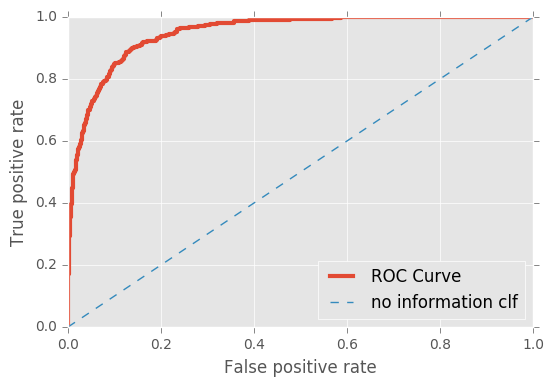

In [5]:
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1])
fig, ax = plt.subplots()
ax.plot(fpr, tpr, label='ROC Curve', linewidth=3)
ax.plot(numpy.arange(0, 1.1, 0.2), numpy.arange(0, 1.1, 0.2), '--', label='no information clf')
ax.legend(loc='lower right')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')